<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Sentiment_analysis_NLP-RNN/blob/main/Assignment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP RNN Assignment
Submitted by: Akanksha rawat

a) Explain the architecture of LSTM and GRU in detail. What were the shortcomings of RNN that were resolved by LSTM and GRU.

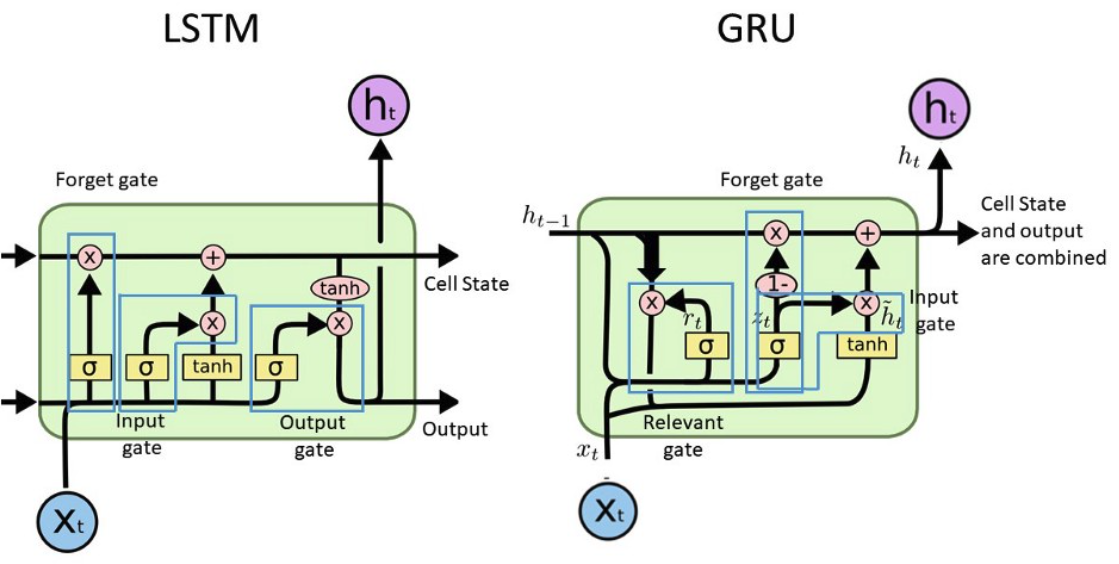

In [1]:
from IPython.display import Image, display

display(Image(filename="/content/LSTM_GRU.png", width=400, height=250))


LSTM (Long Short-Term Memory)

LSTM is an advanced type of Recurrent Neural Network (RNN) designed to work with sequential data, such as time series or natural language. It effectively addresses the problem of short-term memory loss and vanishing gradients, which are common issues in traditional RNNs.

Key Features of LSTM:
It has two output states:
Output State (h<sub>t</sub>): Represents the current output.
Cell State (C<sub>t</sub>): Acts as a memory, retaining information over long periods.
Three Gates:
Forget Gate – Decides what information to discard from the cell state.
Input Gate – Decides which new information to add to the cell state.
Output Gate – Determines the final output.

Operations and Functions:
4 bitwise operations
5 activation functions (commonly sigmoid and tanh)
2 states for managing memory.

Use Case: LSTMs are highly effective in applications like text generation, speech recognition, language translation, and stock price prediction.

----------

GRU (Gated Recurrent Unit)
The GRU is a simplified variant of LSTM that offers comparable accuracy while being computationally more efficient and less time-consuming.

Key Features of GRU:
Maintains one state instead of two.
Two Gates:
Update Gate – Controls how much past information needs to be passed forward.
Reset Gate – Decides how to combine new input with the previous memory.
Three Operators for state transitions.

Three activation functions, typically including sigmoid and tanh.

Use Case: GRUs are suitable for real-time systems where speed and efficiency are crucial, such as chatbots and online recommendation systems.

-----

LSTM and GRU both solve the problem of vanishing gradient leading to short term memory loss which struggles in retaining the information in long sequneces in typical RNN.

b) Use the emotions detection dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab to predict the person’s emotions.

https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data


i. Download the dataset from above link and load it in your Python environment.

ii. Perform the data cleaning like stopwords removal, lowercase, stemming, lemmatization etc.

iii. Perform feature engineering and word embedding techniques like TFIDF, word2Vec, Bag of words etc.

iv. Use the ML algorithms like logistic reg, DT, random forest etc. to predict the emotions.

v. Do the hyperparameter tuning to get the best model.

vi. Finally create a table to compare the performances of all the models and suggest the best model

In [1]:
# connecting to the kaggle by using API token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
# Loading the data from kaggle
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp


Dataset URL: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
License(s): CC-BY-SA-4.0
  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 920MB/s]


In [3]:
# unzipping the data
!unzip emotions-dataset-for-nlp.zip


Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


Data Prepropcessing


In [4]:
# converting train data into dataframe with labelling the columns

import pandas as pd



# Read the file WITHOUT header
df_train = pd.read_csv("/content/train.txt", sep=';', header=None)

# Manually assign column names
df_train.columns = ['text', 'label']

# Display
df_train.head()




,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df_test = pd.read_csv("/content/test.txt", sep=';',header=None)
df_test.columns = ['text', 'label']
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
df_val = pd.read_csv("/content/val.txt", sep=';', header=None)
df_val.columns = ['text', 'label']
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


Lowercasing the data

In [8]:
#lowercase
import pandas as pd

df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()
df_val['text'] = df_val['text'].str.lower()

# verifying
df_train.head()


,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


Removing punctuation and numbers

Pattern [^\w\s]

\w → Matches word characters (letters, numbers, underscore).

\s → Matches whitespace (spaces, tabs, etc.).

[^...] → Negates the set, so it matches everything except words and spaces → i.e., punctuation.

In [9]:
import string
df_train['text'] = df_train['text'].str.replace(r'[^\w\s]','',regex=True)
df_test['text'] = df_test['text'].str.replace(r'[^\w\s]','',regex=True)
df_val['text'] = df_val['text'].str.replace(r'[^\w\s]','',regex=True)
df_train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


Stopwords removal

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [11]:
#stopwords removed from train, test and val dataset
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_val['text'] = df_val['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_train.head()

,text,label
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [12]:
#stemming
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_val['text'] = df_val['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_train.head()


,text,label
0,didnt feel humili,sadness
1,go feel hopeless damn hope around someon care ...,sadness
2,im grab minut post feel greedi wrong,anger
3,ever feel nostalg fireplac know still properti,love
4,feel grouchi,anger


Exploratory data analysis phase

1) Class distribution

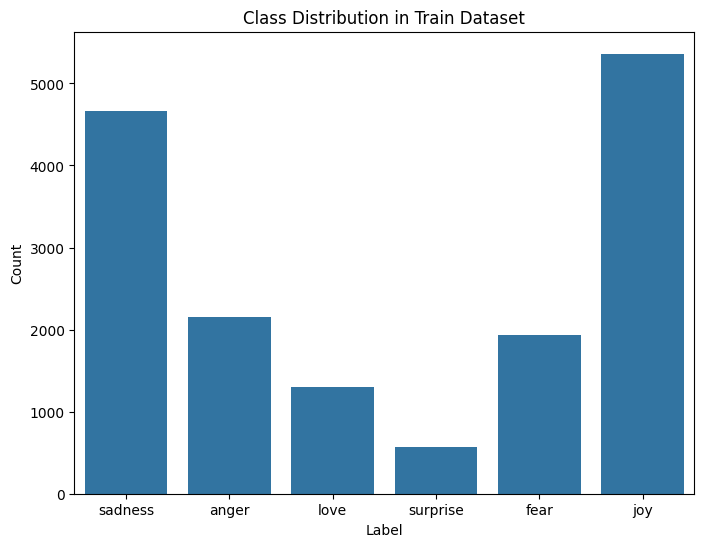

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='label')
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Text length distribution : word count

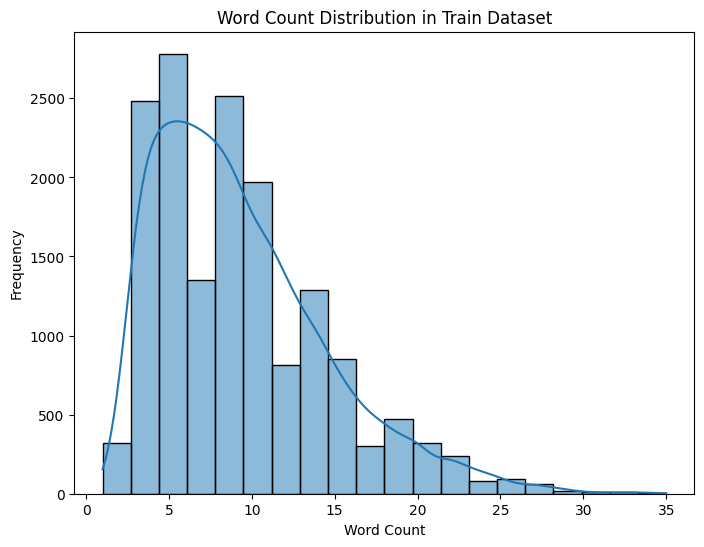

In [14]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='word_count', bins=20, kde=True)
plt.title('Word Count Distribution in Train Dataset')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Most Frequent Words: Word cloud of training dataset

In [16]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 16.2 MB/s eta 0:00:00


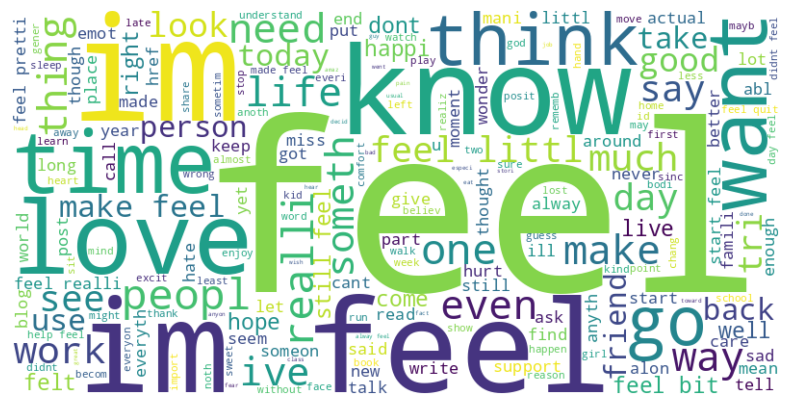

In [17]:
from collections import Counter

# Combine all text into a single string
all_text = ' '.join(df_train['text'])
# create word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Train Dataset')
plt.show()

Frequent Words by class : comparaing top words per label to see which words are strongly associated with each class

In [18]:
from collections import Counter

def top_words_by_class (df, label_col, text_col, n=10):
  for label in df[label_col].unique():
    words = " ".join(df[df[label_col]==label][text_col]).split()
    most_common = Counter(words).most_common(n)
    print(f"Top {n} words for {label}: {most_common}")

top_words_by_class(df_train, 'label', 'text')


Top 10 words for sadness: [('feel', 4994), ('like', 881), ('im', 683), ('know', 297), ('get', 284), ('realli', 276), ('time', 271), ('make', 245), ('want', 244), ('go', 235)]
Top 10 words for anger: [('feel', 2261), ('like', 391), ('im', 342), ('get', 175), ('time', 140), ('want', 133), ('irrit', 128), ('realli', 124), ('know', 122), ('hate', 113)]
Top 10 words for love: [('feel', 1406), ('like', 366), ('love', 277), ('im', 193), ('support', 103), ('realli', 92), ('know', 89), ('want', 89), ('time', 82), ('care', 82)]
Top 10 words for surprise: [('feel', 601), ('amaz', 107), ('like', 92), ('im', 91), ('impress', 63), ('overwhelm', 58), ('weird', 57), ('surpris', 56), ('curiou', 54), ('funni', 49)]
Top 10 words for fear: [('feel', 2025), ('im', 322), ('like', 264), ('littl', 149), ('go', 139), ('know', 136), ('bit', 118), ('want', 113), ('time', 110), ('get', 107)]
Top 10 words for joy: [('feel', 5674), ('like', 1023), ('im', 799), ('make', 381), ('time', 334), ('get', 322), ('go', 315)

Sentiment Visualization

In [20]:
! pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 17.6 MB/s eta 0:00:00


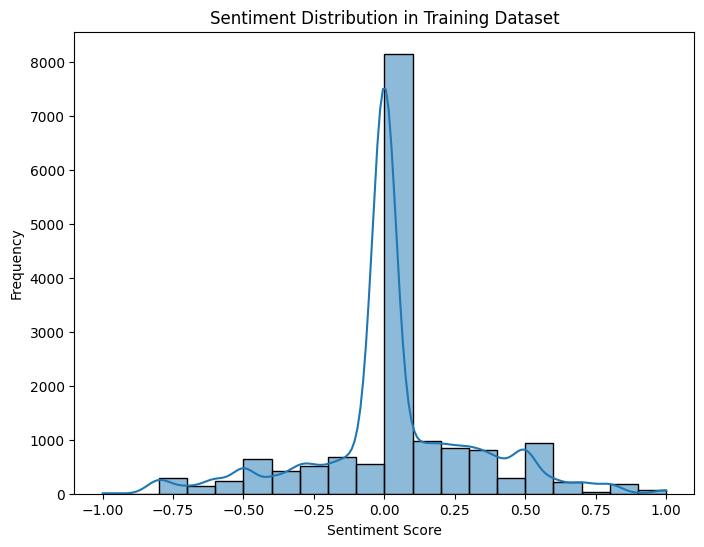

In [21]:
from textblob import TextBlob

df_train['sentiment'] = df_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='sentiment', bins=20, kde=True)
plt.title('Sentiment Distribution in Training Dataset')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

#Feature Engineering and Word Embedding
Transformations that learn something from the data (TF-IDF, vocabulary building, scalers) →

Fit on train only,

Apply to val/test using the learned mapping.

In [22]:
# TF- IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(df_train['text'])
tfidf_test = tfidf_vectorizer.transform(df_test['text'])
tfidf_val = tfidf_vectorizer.transform(df_val['text'])




In [23]:
# converts to dataframe
df_train_tfidf = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(df_train_tfidf)

        aa  aaaaaaand  aaaaand  aaaand  aac  aahhh  aaron   ab  abandon  abat  \
0      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
1      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
2      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
3      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
4      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
...    ...        ...      ...     ...  ...    ...    ...  ...      ...   ...   
15995  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15996  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15997  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15998  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15999  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   

       ...  zombi  zone  zo

In [24]:
# prepararing data for modelling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['label'])
df_test['label'] = le.transform(df_test['label'])
df_val['label'] = le.transform(df_val['label'])


In [25]:
#spillting data into x and y
X_train = tfidf_train
y_train = df_train['label']
X_test = tfidf_test
y_test = df_test['label']
X_val = tfidf_val
y_val = df_val['label']

Importing the machine learning models and fitting the data

In [27]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 1.3 MB/s eta 0:00:00


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

for model in [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), XGBClassifier(), SGDClassifier(), MultinomialNB(), KNeighborsClassifier()]:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("Model Test accuracy")
  print(f"{type(model).__name__}:{accuracy_score(y_test, y_pred)}")


Model Test accuracy
LogisticRegression:0.8415
Model Test accuracy
DecisionTreeClassifier:0.7905
Model Test accuracy
RandomForestClassifier:0.85
Model Test accuracy
SVC:0.839
Model Test accuracy
XGBClassifier:0.851
Model Test accuracy
SGDClassifier:0.8635
Model Test accuracy
MultinomialNB:0.688
Model Test accuracy
KNeighborsClassifier:0.7545


| **Model**                  | **Test Accuracy** |
|----------------------------|-------------------|
| Logistic Regression        | 0.8415            |
| Decision Tree Classifier   | 0.7885            |
| Random Forest Classifier   | 0.8555            |
| SVC (Support Vector Classifier) | 0.839       |
| XGB Classifier             | 0.851             |
| SGD Classifier             | **0.863**         |
| Multinomial NB             | 0.688             |
| KNeighbors Classifier      | 0.7555            |



AS SGD Classifier giving me very good accuracy among all the models, so I am doing hyperparameter tuning to improve it further.

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
import numpy as np

# Define hyperparameter distributions
param_dist = {
    'loss': ['hinge', 'log_loss'],            # hinge = SVM, log_loss = logistic regression
    'alpha': np.logspace(-4, -2, 10),         # Regularization strength (random values between 1e-4 and 1e-2)
    'penalty': ['l2', 'elasticnet'],          # Regularization type
    'learning_rate': ['optimal', 'adaptive'], # Learning rate schedule
    'eta0': np.linspace(0.001, 0.01, 5)       # Initial learning rate
}

# Initialize SGD Classifier
sgd_clf = SGDClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=sgd_clf,
    param_distributions=param_dist,
    n_iter=20,                # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': np.float64(0.01), 'alpha': np.float64(0.0001)}
Best Score: 0.8643750000000001


In [30]:
# check best model
print("Best Parameters", random_search.best_params_)
print("Best CV Accuracy", random_search.best_score_)

Best Parameters {'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': np.float64(0.01), 'alpha': np.float64(0.0001)}
Best CV Accuracy 0.8643750000000001


In [31]:

# Evaluate on Test set
SGD_random_search = random_search.best_estimator_
y_pred = SGD_random_search.predict(X_test)
print("Test Accuracy", accuracy_score(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))
# Confusion Matrix


Test Accuracy 0.8675
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       275
           1       0.87      0.82      0.84       224
           2       0.87      0.94      0.90       695
           3       0.84      0.57      0.68       159
           4       0.90      0.91      0.90       581
           5       0.69      0.65      0.67        66

    accuracy                           0.87      2000
   macro avg       0.84      0.79      0.81      2000
weighted avg       0.87      0.87      0.86      2000



Observations:
 1. Class 3 and class 5 having low recall compared to the other classes so model struggles to detect class 3 and class 5 that might be due to low support of 159 and 66 compared to other classes, it's a class imbalance.

 2. Macro average recall (0.79) is much lower than the weighted recall (0.87), confirming imbalance.

Confusion Matrix


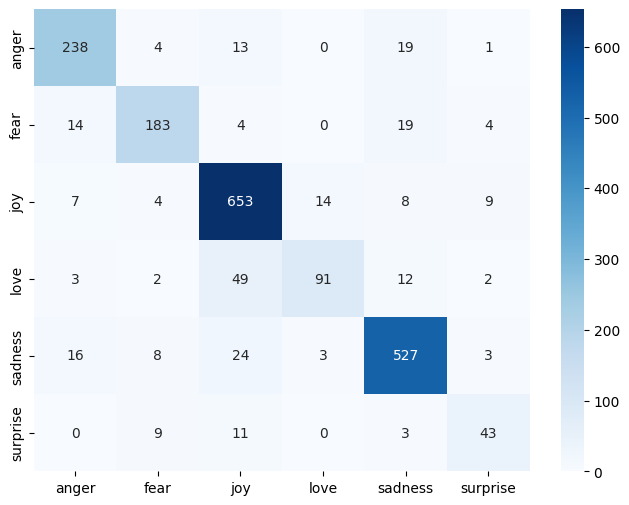

In [32]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
# confusion matrix in blue grid
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.show()


In [33]:
# simple function to compare test accuracy, precision, recall, F1 score for the models
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    # Get predicted probabilities
    y_pred_prob = model.predict(X_test)

    # Check if it's 2D (probabilities from Keras) or 1D (sklearn labels)
    if len(y_pred_prob.shape) > 1:
        # Keras model → convert probabilities to class labels
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        # Sklearn model → already labels
        y_pred = y_pred_prob

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1


In [34]:
# simple function to compare test accuracy, precision, recall, F1 score for the models

def evaluate_multiple_models(models, X_test, y_test):
    """Evaluate multiple models and return results as a DataFrame."""
    results = []

    for name, model in models:
        accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)

        results.append({
            'Model': name,  # Get model class name
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    # Convert list of dictionaries to DataFrame
    df_results = pd.DataFrame(results)
    return df_results





In [35]:
models = [("SGD_random_search_final",SGD_random_search)]  # Replace with your actual trained models

df_results_to_do_strings = evaluate_multiple_models(models, X_test, y_test)
print(df_results_to_do_strings)

                     Model  Accuracy  Precision  Recall  F1 Score
0  SGD_random_search_final    0.8675   0.866504  0.8675  0.864297


c) Using the same Emotions Dataset for NLP from the Kaggle link in above question, now approach the problem using deep learning and transformer-based models. Perform the following steps:

i. Download the dataset from above link and load it in your Python environment.

ii. Perform the data cleaning like stopwords removal, lowercase, stemming, lemmatization etc.

iii. Use DL models like Simple RNN, LSTM, GRU, Bidirectional RNN/LSTM/GRU, Stacked RNN/LSTM/GRU

iv. Use the KerasTuner to tune the parameters.

v. Now use the pretrained models – BERT, DistilBERT, RoBERTa

vi. Check for overfitting and underfitting

vii. Finally create a table to compare the performances of all the models and suggest the best model

Now using the DL models to fit the data

Simple RNN

In [37]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.1 MB/s eta 0:00:00


In [38]:
# simple RNN
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [39]:
max_words = 20000 # Vocabulary size
max_len = 17   # max length for padding

# Tokenize Text: Maps words → unique integer indices
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# fit only on training data: Build word index only from training set
tokenizer.fit_on_texts(df_train['text'])

# Convert text to sequences: Converts sentences → integer sequences
X_train_seq = tokenizer.texts_to_sequences(df_train['text'])
X_test_seq = tokenizer.texts_to_sequences(df_test['text'])
X_val_seq = tokenizer.texts_to_sequences(df_val['text'])

# Pad sequence: Ensures all sequences have same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

# Step1 : Build RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(units=128))
Dropout(0.5)
rnn_model.add(Dense(units=len(le.classes_), activation='softmax'))

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
import numpy as np
sentence_lengths = [len(seq) for seq in X_train_seq]
print(np.percentile(sentence_lengths, [50,76,90,95]))

[ 8. 12. 17. 20.]


In [41]:
history= rnn_model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4821 - loss: 1.3557 - val_accuracy: 0.7480 - val_loss: 0.7208
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8515 - loss: 0.4489 - val_accuracy: 0.7935 - val_loss: 0.6342
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9333 - loss: 0.2115 - val_accuracy: 0.7815 - val_loss: 0.7110
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9627 - loss: 0.1278 - val_accuracy: 0.7985 - val_loss: 0.7746
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9655 - loss: 0.1101 - val_accuracy: 0.7460 - val_loss: 0.9162
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9745 - loss: 0.0882 - val_accuracy: 0.7620 - val_loss: 0.9130
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9783 - loss: 0.0722 - val_accuracy: 0.7510 - val_loss: 0.9364
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9769 - loss: 0.0705 - val_accuracy: 0.

In [42]:
models = [("SimpleRNN",rnn_model),]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
       Model  Accuracy  Precision  Recall  F1 Score
0  SimpleRNN    0.7535   0.750218  0.7535  0.749692


LSTM

In [43]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units=len(le.classes_), activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
history1 = lstm_model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3701 - loss: 1.4795 - val_accuracy: 0.7490 - val_loss: 0.7393
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8301 - loss: 0.5023 - val_accuracy: 0.8735 - val_loss: 0.3658
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9324 - loss: 0.2172 - val_accuracy: 0.8675 - val_loss: 0.4260
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9499 - loss: 0.1591 - val_accuracy: 0.8790 - val_loss: 0.4019
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9611 - loss: 0.1124 - val_accuracy: 0.8795 - val_loss: 0.4254
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9723 - loss: 0.0808 - val_accuracy: 0.8720 - val_loss: 0.4395
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9772 - loss: 0.0696 - val_accuracy: 0.8750 - val_loss: 0.4476
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9813 - loss: 0.0551 - val_accu

In [45]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
       Model  Accuracy  Precision  Recall  F1 Score
0  SimpleRNN    0.7535   0.750218  0.7535  0.749692
1       LSTM    0.8550   0.856740  0.8550  0.855591


GRU

In [46]:
# GRU Model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
gru_model.add(GRU(128, dropout=0, recurrent_dropout=0))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(len(le.classes_), activation='softmax'))

gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [47]:
history2 = gru_model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3377 - loss: 1.5574 - val_accuracy: 0.8105 - val_loss: 0.5539
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8676 - loss: 0.4007 - val_accuracy: 0.8955 - val_loss: 0.2971
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9370 - loss: 0.1830 - val_accuracy: 0.8905 - val_loss: 0.3082
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9563 - loss: 0.1206 - val_accuracy: 0.8810 - val_loss: 0.3430
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9671 - loss: 0.0918 - val_accuracy: 0.8865 - val_loss: 0.4034
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9750 - loss: 0.0697 - val_accuracy: 0.8785 - val_loss: 0.4479
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9791 - loss: 0.0592 - val_accuracy: 0.8815 - val_loss: 0.4287
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9823 - loss: 0.0475 - val_accu

In [48]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
       Model  Accuracy  Precision  Recall  F1 Score
0  SimpleRNN    0.7535   0.750218  0.7535  0.749692
1       LSTM    0.8550   0.856740  0.8550  0.855591
2        GRU    0.8600   0.861677  0.8600  0.860515


Bidirectional RNN, LSTM, GRU

In [49]:
# Bidirectional RNN
from tensorflow.keras.layers import Bidirectional

bidirectional_rnn = Sequential()
bidirectional_rnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
bidirectional_rnn.add(Bidirectional(SimpleRNN(units=128)))
Dropout(0.5)
bidirectional_rnn.add(Dense(units=len(le.classes_), activation='softmax'))

bidirectional_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
history3 = bidirectional_rnn.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4734 - loss: 1.3820 - val_accuracy: 0.7560 - val_loss: 0.7666
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8547 - loss: 0.4484 - val_accuracy: 0.8065 - val_loss: 0.6023
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9447 - loss: 0.1787 - val_accuracy: 0.8020 - val_loss: 0.6655
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9717 - loss: 0.0943 - val_accuracy: 0.7865 - val_loss: 0.7933
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9836 - loss: 0.0591 - val_accuracy: 0.7805 - val_loss: 0.8131
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9825 - loss: 0.0577 - val_accuracy: 0.7975 - val_loss: 0.8069
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9840 - loss: 0.0527 - val_accuracy: 0.7890 - val_loss: 0.8488
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9886 - loss: 0.0417 - val_accuracy: 0.

In [51]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("BidirectionalRNN",bidirectional_rnn)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              Model  Accuracy  Precision  Recall  F1 Score
0         SimpleRNN    0.7535   0.750218  0.7535  0.749692
1              LSTM    0.8550   0.856740  0.8550  0.855591
2               GRU    0.8600   0.861677  0.8600  0.860515
3  BidirectionalRNN    0.7245   0.759315  0.7245  0.736502


Bidirectional LSTM

In [52]:
# Bidirectional LSTM
from tensorflow.keras.layers import Bidirectional

bidirectional_lstm = Sequential()
bidirectional_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
bidirectional_lstm.add(Bidirectional(LSTM(units=128)))
Dropout(0.5)
bidirectional_lstm.add(Dense(units=len(le.classes_), activation='softmax'))

bidirectional_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [53]:
history4 = bidirectional_lstm.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4938 - loss: 1.2624 - val_accuracy: 0.8585 - val_loss: 0.4045
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9149 - loss: 0.2421 - val_accuracy: 0.8815 - val_loss: 0.3244
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9560 - loss: 0.1208 - val_accuracy: 0.8840 - val_loss: 0.3459
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9696 - loss: 0.0791 - val_accuracy: 0.8760 - val_loss: 0.4099
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9770 - loss: 0.0605 - val_accuracy: 0.8850 - val_loss: 0.4361
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9822 - loss: 0.0463 - val_accuracy: 0.8755 - val_loss: 0.4657
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9847 - loss: 0.0448 - val_accuracy: 0.8755 - val_loss: 0.4947
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9868 - loss: 0.0395 - val_accu

In [54]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7535   0.750218  0.7535  0.749692
1                LSTM    0.8550   0.856740  0.8550  0.855591
2                 GRU    0.8600   0.861677  0.8600  0.860515
3   Bidirectional_RNN    0.7245   0.759315  0.7245  0.736502
4  Bidirectional_LSTM    0.8540   0.854798  0.8540  0.853602


In [55]:
# Bidirectional GRU
from tensorflow.keras.layers import Bidirectional

bidirectional_gru = Sequential()
bidirectional_gru.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
bidirectional_gru.add(Bidirectional(GRU(units=128)))
Dropout(0.5)
bidirectional_gru.add(Dense(units=len(le.classes_), activation='softmax'))

bidirectional_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [56]:
history5 = bidirectional_gru.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5126 - loss: 1.2457 - val_accuracy: 0.8830 - val_loss: 0.3272
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9167 - loss: 0.2271 - val_accuracy: 0.8890 - val_loss: 0.3080
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9494 - loss: 0.1244 - val_accuracy: 0.8915 - val_loss: 0.3331
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9694 - loss: 0.0837 - val_accuracy: 0.8860 - val_loss: 0.3641
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9771 - loss: 0.0610 - val_accuracy: 0.8850 - val_loss: 0.4282
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9831 - loss: 0.0446 - val_accuracy: 0.8845 - val_loss: 0.4647
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9863 - loss: 0.0363 - val_accuracy: 0.8785 - val_loss: 0.4728
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9881 - loss: 0.0322 - val_accu

In [57]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),("Bidirectional_GRU",bidirectional_gru)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7535   0.750218  0.7535  0.749692
1                LSTM    0.8550   0.856740  0.8550  0.855591
2                 GRU    0.8600   0.861677  0.8600  0.860515
3   Bidirectional_RNN    0.7245   0.759315  0.7245  0.736502
4  Bidirectional_LSTM    0.8540   0.854798  0.8540  0.853602
5   Bidirectional_GRU    0.8690   0.871020  0.8690  0.869752


Stacked RNN

In [58]:
# Stacked RNN

stacked_rnn = Sequential()
stacked_rnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# First RNN layer (must return sequences for the next RNN layer)
stacked_rnn.add(SimpleRNN(units=128, return_sequences=True))

# Second RNN layer (final one, return_sequences=False by default)
stacked_rnn.add(SimpleRNN(units=64))

Dropout(0.5)
stacked_rnn.add(Dense(units=len(le.classes_), activation='softmax'))

stacked_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [59]:
history6 = stacked_rnn.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4540 - loss: 1.3897 - val_accuracy: 0.7685 - val_loss: 0.6986
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8311 - loss: 0.5097 - val_accuracy: 0.7945 - val_loss: 0.6453
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9156 - loss: 0.2670 - val_accuracy: 0.7885 - val_loss: 0.7114
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9453 - loss: 0.1704 - val_accuracy: 0.7635 - val_loss: 0.8376
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9607 - loss: 0.1300 - val_accuracy: 0.7830 - val_loss: 0.8032
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9711 - loss: 0.0951 - val_accuracy: 0.7845 - val_loss: 0.8014
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9681 - loss: 0.1008 - val_accuracy: 0.7775 - val_loss: 0.8666
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9758 - loss: 0.0741 - val_accuracy: 0

In [60]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7535   0.750218  0.7535  0.749692
1                LSTM    0.8550   0.856740  0.8550  0.855591
2                 GRU    0.8600   0.861677  0.8600  0.860515
3   Bidirectional_RNN    0.7245   0.759315  0.7245  0.736502
4  Bidirectional_LSTM    0.8540   0.854798  0.8540  0.853602
5   Bidirectional_GRU    0.8690   0.871020  0.8690  0.869752
6         Stacked_RNN    0.7835   0.781538  0.7835  0.779159


Stacked LSTM

In [61]:
# Stacked LSTM

stacked_lstm = Sequential()
stacked_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# First RNN layer (must return sequences for the next RNN layer)
stacked_lstm.add(LSTM(units=128, return_sequences=True))

# Second RNN layer (final one, return_sequences=False by default)
stacked_lstm.add(LSTM(units=64))

Dropout(0.5)
stacked_lstm.add(Dense(units=len(le.classes_), activation='softmax'))

stacked_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [62]:
history6 = stacked_lstm.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4074 - loss: 1.3912 - val_accuracy: 0.8510 - val_loss: 0.4508
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8909 - loss: 0.3281 - val_accuracy: 0.8795 - val_loss: 0.3542
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9405 - loss: 0.1717 - val_accuracy: 0.8835 - val_loss: 0.3463
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9589 - loss: 0.1132 - val_accuracy: 0.8800 - val_loss: 0.3743
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9663 - loss: 0.0915 - val_accuracy: 0.8770 - val_loss: 0.4363
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9760 - loss: 0.0667 - val_accuracy: 0.8740 - val_loss: 0.4717
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9770 - loss: 0.0617 - val_accuracy: 0.8745 - val_loss: 0.5101
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9829 - loss: 0.0486 - val_acc

In [63]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn),("Stacked_LSTM",stacked_lstm)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7535   0.750218  0.7535  0.749692
1                LSTM    0.8550   0.856740  0.8550  0.855591
2                 GRU    0.8600   0.861677  0.8600  0.860515
3   Bidirectional_RNN    0.7245   0.759315  0.7245  0.736502
4  Bidirectional_LSTM    0.8540   0.854798  0.8540  0.853602
5   Bidirectional_GRU    0.8690   0.871020  0.8690  0.869752
6         Stacked_RNN    0.7835   0.781538  0.7835  0.779159
7        Stacked_LSTM    0.8595   0.859532  0.8595  0.859006


Stacked GRU

In [64]:
# Stacked GRU

stacked_gru = Sequential()
stacked_gru.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# First RNN layer (must return sequences for the next RNN layer)
stacked_gru.add(GRU(units=128, return_sequences=True))

# Second RNN layer (final one, return_sequences=False by default)
stacked_gru.add(GRU(units=64))

Dropout(0.5)
stacked_gru.add(Dense(units=len(le.classes_), activation='softmax'))

stacked_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [65]:
history7 = stacked_gru.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4031 - loss: 1.4383 - val_accuracy: 0.8290 - val_loss: 0.4758
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9037 - loss: 0.2914 - val_accuracy: 0.8885 - val_loss: 0.3009
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9494 - loss: 0.1394 - val_accuracy: 0.8870 - val_loss: 0.3378
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9653 - loss: 0.0872 - val_accuracy: 0.8870 - val_loss: 0.3577
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9752 - loss: 0.0618 - val_accuracy: 0.8845 - val_loss: 0.4235
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9784 - loss: 0.0547 - val_accuracy: 0.8915 - val_loss: 0.4320
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9840 - loss: 0.0411 - val_accuracy: 0.8850 - val_loss: 0.4927
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9878 - loss: 0.0291 - val_accu

In [66]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn),("Stacked_LSTM",stacked_lstm),("Stacked_GRU",stacked_gru)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7535   0.750218  0.7535  0.749692
1                LSTM    0.8550   0.856740  0.8550  0.855591
2                 GRU    0.8600   0.861677  0.8600  0.860515
3   Bidirectional_RNN    0.7245   0.759315  0.7245  0.736502
4  Bidirectional_LSTM    0.8540   0.854798  0.8540  0.853602
5   Bidirectional_GRU    0.8690   0.871020  0.8690  0.869752
6         Stacked_RNN    0.7835   0.781538  0.7835  0.779159
7        Stacked_LSTM    0.8595   0.859532  0.8595  0.859006
8         Stacked_GRU    0.8635   0.870526  0.8635  0.864975


Using Keras Tuner to tune the parameters

In [67]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00


In [68]:
# Keras tuner
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.optimizers import Adam




def build_stacked_gru_model(hp):
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

    # First GRU layer
    model.add(GRU(
        units=hp.Int('gru_units_1', min_value=32, max_value=256, step=32),
        return_sequences=True,   # Needed to stack another GRU layer
        dropout=hp.Float('dropout_gru_1', 0.2, 0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_gru_1', 0.0, 0.3, step=0.1)
    ))

    # Second GRU layer
    model.add(GRU(
        units=hp.Int('gru_units_2', min_value=32, max_value=256, step=32),
        dropout=hp.Float('dropout_gru_2', 0.2, 0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_gru_2', 0.0, 0.3, step=0.1)
    ))

    # Dropout before output
    model.add(Dropout(hp.Float('dropout_final', 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(len(le.classes_), activation='softmax'))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model




In [69]:
tuner = kt.RandomSearch(
    build_stacked_gru_model,
    objective='val_accuracy',
    max_trials=5,                 # Number of different hyperparameter combinations to try
    executions_per_trial=1,       # Runs each trial once
    directory='tuner_results',
    project_name='stacked_gru_tuning'
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [70]:
tuner.search(
    X_train_pad, y_train,
    epochs=20,
    validation_data=(X_val_pad, y_val),
    verbose=1

)

Trial 5 Complete [00h 03m 40s]
val_accuracy: 0.8899999856948853

Best val_accuracy So Far: 0.8974999785423279
Total elapsed time: 00h 15m 57s


In [71]:
# Get the best model
Tuned_stacked_GRU = tuner.get_best_models(num_models=1)[0]

# Evaluate on test data
loss, accuracy = Tuned_stacked_GRU.evaluate(X_test_pad, y_test)
print(f"Best Model Test Accuracy: {accuracy:.4f}")

# Best hyperparameters
best_hyperparams = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(f"First GRU units: {best_hyperparams.get('gru_units_1')}")
print(f"Second GRU units: {best_hyperparams.get('gru_units_2')}")
print(f"Dropout final: {best_hyperparams.get('dropout_final')}")
print(f"Learning Rate: {best_hyperparams.get('learning_rate')}")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8871 - loss: 0.3080
Best Model Test Accuracy: 0.8895
Best Hyperparameters:
First GRU units: 256
Second GRU units: 224
Dropout final: 0.4
Learning Rate: 0.001


In [72]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn),("Stacked_LSTM",stacked_lstm),("Stacked_GRU",stacked_gru),("Tuned_Stacked_GRU",Tuned_stacked_GRU)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7535   0.750218  0.7535  0.749692
1                LSTM    0.8550   0.856740  0.8550  0.855591
2                 GRU    0.8600   0.861677  0.8600  0.860515
3   Bidirectional_RNN    0.7245   0.759315  0.7245  0.736502
4  Bidirectional_LSTM    0.8540   0.854798  0.8540  0.853602
5   Bidirectional_GRU    0.8690   0.871020  0.8690  0.869752
6         Stacked_RNN    0.7835   0.781538  0.7835  0.779159
7        Stacked_LSTM    0.8595   0.859532  0.8595  0.859006
8         Stacked_GRU    0.8635   0.870526  0.8635  0.864975

#Now use the pretrained models – BERT, DistilBERT, RoBERTa

In [10]:
 #connecting to the kaggle by using API token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
# Loading the data from kaggle
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

Dataset URL: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
License(s): CC-BY-SA-4.0
emotions-dataset-for-nlp.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
# unzipping the data
!unzip emotions-dataset-for-nlp.zip

Archive:  emotions-dataset-for-nlp.zip
replace test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.txt                
replace train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.txt               
replace val.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: val.txt                 


In [14]:
import pandas as pd
import numpy as np

# Read the file WITHOUT header
df_train_raw = pd.read_csv("/content/train.txt", sep=';', header=None)
df_test_raw = pd.read_csv("/content/test.txt", sep=';', header=None)
df_val_raw = pd.read_csv("/content/val.txt", sep=';', header=None)

# Manually assign column names
df_train_raw.columns = ['text', 'true_label']
df_test_raw.columns = ['text', 'true_label']
df_val_raw.columns = ['text', 'true_label']

# Display
df_test_raw.head()

,text,true_label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


BERT Model

In [ ]:
from transformers import AutoTokenizer, TFBertForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# =============================
# 1. Encode labels
# =============================
le = LabelEncoder()
df_train_raw['true_label'] = le.fit_transform(df_train_raw['true_label'])
df_val_raw['true_label'] = le.transform(df_val_raw['true_label'])
df_test_raw['true_label'] = le.transform(df_test_raw['true_label'])

num_classes = len(le.classes_)
print(f"Number of Classes: {num_classes}")

# =============================
# 2. Tokenizer
# =============================
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

train_encodings = tokenize_texts(df_train_raw['text'], max_len=128)
val_encodings   = tokenize_texts(df_val_raw['text'], max_len=128)
test_encodings  = tokenize_texts(df_test_raw['text'], max_len=128)

# =============================
# 3. tf.data pipeline
# =============================
def create_tf_dataset(encodings, labels, shuffle=False, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset1 = create_tf_dataset(train_encodings, df_train_raw['true_label'].values, shuffle=True)
val_dataset1   = create_tf_dataset(val_encodings, df_val_raw['true_label'].values)
test_dataset1  = create_tf_dataset(test_encodings, df_test_raw['true_label'].values)

# =============================
# 4. Build BERT Model
# =============================
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_classes,
    from_pt=True
)

# =============================
# 5. Optimizer (AdamW with linear decay)
# =============================
batch_size = 32
num_train_steps = int(len(df_train_raw) / batch_size * 3)  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,  # Start with a slightly higher LR
    num_warmup_steps=0.1 * num_train_steps,  # Warmup helps stability
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# =============================
# 6. Compile the model
# =============================
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# =============================
# 8. Train the model
# =============================
history = bert_model.fit(
    train_dataset1,
    validation_data=val_dataset1,
    epochs=3
)

# =============================
# 9. Evaluate on test data
# =============================
test_loss, test_acc = bert_model.evaluate(test_dataset1)
print(f"\nTest Accuracy: {test_acc:.4f}")




Number of Classes: 6


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
  4/500 [..............................] - ETA: 6:09:33 - loss: 1.9095 - accuracy: 0.1172

DistilBERT

In [ ]:
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# =============================
# 1. Encode labels
# =============================
le = LabelEncoder()
df_train_raw['true_label'] = le.fit_transform(df_train_raw['true_label'])
df_val_raw['true_label'] = le.transform(df_val_raw['true_label'])
df_test_raw['true_label'] = le.transform(df_test_raw['true_label'])

num_classes = len(le.classes_)
print(f"Number of Classes: {num_classes}")

# =============================
# 2. Tokenizer
# =============================
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

train_encodings = tokenize_texts(df_train_raw['text'], max_len=128)
val_encodings   = tokenize_texts(df_val_raw['text'], max_len=128)
test_encodings  = tokenize_texts(df_test_raw['text'], max_len=128)

# =============================
# 3. tf.data pipeline
# =============================
def create_tf_dataset(encodings, labels, shuffle=False, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset2 = create_tf_dataset(train_encodings, df_train_raw['true_label'].values, shuffle=True)
val_dataset2   = create_tf_dataset(val_encodings, df_val_raw['true_label'].values)
test_dataset2  = create_tf_dataset(test_encodings, df_test_raw['true_label'].values)

# =============================
# 4. Build BERT Model
# =============================
Distil_model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_classes,
    from_pt=True
)

# =============================
# 5. Optimizer (AdamW with linear decay)
# =============================
batch_size = 32
num_train_steps = int(len(df_train_raw) / batch_size * 3)  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,  # Start with a slightly higher LR
    num_warmup_steps=0.1 * num_train_steps,  # Warmup helps stability
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# =============================
# 6. Compile the model
# =============================
Distil_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# =============================
# 8. Train the model
# =============================
history = Distil_model.fit(
    train_dataset2,
    validation_data=val_dataset2,
    epochs=5
)

# =============================
# 9. Evaluate on test data
# =============================
test_loss, test_acc = Distil_model.evaluate(test_dataset2)
print(f"\nTest Accuracy: {test_acc:.4f}")





Roberta

In [ ]:
from transformers import AutoTokenizer, TFRobertaForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# =============================
# 1. Encode labels
# =============================
le = LabelEncoder()
df_train_raw['true_label'] = le.fit_transform(df_train_raw['true_label'])
df_val_raw['true_label'] = le.transform(df_val_raw['true_label'])
df_test_raw['true_label'] = le.transform(df_test_raw['true_label'])

num_classes = len(le.classes_)
print(f"Number of Classes: {num_classes}")

# =============================
# 2. Tokenizer
# =============================
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def tokenize_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

train_encodings = tokenize_texts(df_train_raw['text'], max_len=128)
val_encodings   = tokenize_texts(df_val_raw['text'], max_len=128)
test_encodings  = tokenize_texts(df_test_raw['text'], max_len=128)

# =============================
# 3. tf.data pipeline
# =============================
def create_tf_dataset(encodings, labels, shuffle=False, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset3 = create_tf_dataset(train_encodings, df_train_raw['true_label'].values, shuffle=True)
val_dataset3   = create_tf_dataset(val_encodings, df_val_raw['true_label'].values)
test_dataset3  = create_tf_dataset(test_encodings, df_test_raw['true_label'].values)

# =============================
# 4. Build BERT Model
# =============================
Roberta_model = TFRobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=num_classes,
    from_pt=True
)

# =============================
# 5. Optimizer (AdamW with linear decay)
# =============================
batch_size = 32
num_train_steps = int(len(df_train_raw) / batch_size * 3)  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,  # Start with a slightly higher LR
    num_warmup_steps=0.1 * num_train_steps,  # Warmup helps stability
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# =============================
# 6. Compile the model
# =============================
Roberta_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# =============================
# 8. Train the model
# =============================
history = Roberta_model.fit(
    train_dataset3,
    validation_data=val_dataset3,
    epochs=3
)
# =============================
# 9. Evaluate on test data
# =============================
test_loss, test_acc = Roberta_model.evaluate(test_dataset3)
print(f"\nTest Accuracy: {test_acc:.4f}")



In [ ]:
# Evaluate transformer models on the test set and add to the results DataFrame
loss_bert, accuracy_bert = Bert_model.evaluate(test_dataset1)
print(f"BERT Test Accuracy: {accuracy_bert:.4f}")

loss_distilbert, accuracy_distilbert = Distilbert_model.evaluate(test_dataset2)
print(f"DistilBERT Test Accuracy: {accuracy_distilbert:.4f}")

loss_roberta, accuracy_roberta = Roberta_model.evaluate(test_dataset3)
print(f"RoBERTa Test Accuracy: {accuracy_roberta:.4f}")

In [ ]:
# Add transformer model results to the comparison table
# First, get predictions to calculate precision, recall, and F1-score
y_pred_bert = tf.argmax(model.predict(test_dataset1).logits, axis=1).numpy()
y_pred_distilbert = tf.argmax(distilbert_model.predict(test_dataset2).logits, axis=1).numpy()
y_pred_roberta = tf.argmax(Roberta_model.predict(test_dataset3).logits, axis=1).numpy()

# Evaluate and add to the results DataFrame
bert_metrics = evaluate_model(Bert_model, test_dataset1, y_test) # Use the function defined earlier
distilbert_metrics = evaluate_model(Distilbert_model, test_dataset2, y_test)
roberta_metrics = evaluate_model(Roberta_model, test_dataset3, y_test)

transformer_results = [
    {'Model': 'Bert_model', 'Accuracy': bert_metrics[0], 'Precision': bert_metrics[1], 'Recall': bert_metrics[2], 'F1 Score': bert_metrics[3]},
    {'Model': 'DistilBERT_model', 'Accuracy': distilbert_metrics[0], 'Precision': distilbert_metrics[1], 'Recall': distilbert_metrics[2], 'F1 Score': distilbert_metrics[3]},
    {'Model': 'Roberta_model', 'Accuracy': roberta_metrics[0], 'Precision': roberta_metrics[1], 'Recall': roberta_metrics[2], 'F1 Score': roberta_metrics[3]}
]

df_transformer_results = pd.DataFrame(transformer_results)

# Concatenate with existing results
df_results_to_do_strings = pd.concat([df_results_to_do_strings, df_transformer_results], ignore_index=True)

print(df_results_to_do_strings)

Now, I will check for overfitting and underfitting in the models and finally create a table to compare the performances of all the models and suggest the best model.

d) Explain the different types of feature engineering techniques like one hot encoding, bag of words, TFIDF etc. How word2vec is different from them. Explain its working with example.